# Self-supervised denoiser impulse response

**Authors: Nick Luiken, Matteo Ravasi - KAUST**

In this notebook, we display the impulse response (aka receptive field) of both the original blind-spot denoiser of [Laine et al.](https://arxiv.org/abs/1901.10277) and our modified version for structured noise.

In order to obtain the impulse response we feed an zero image with a single unitary pixel in the middle in the blind-spot networks with constant weights and zero biases.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

from ssdeblend.model.ssdenoise import NoiseNetwork
from ssdeblend.model.ssstructdenoise import NoiseNetwork as StructNoiseNetwork
from ssdeblend.model.utils import display_receptive

Let's set the device to use our GPU of choice

In [2]:
device = 'cuda:0'
print(torch.cuda.get_device_name(device))

NVIDIA GeForce RTX 3090


## Blind-spot network for random noise

Let's first create the network

In [3]:
network = NoiseNetwork(1, 1, blindspot=True).to(device)

And now we can display its receptive field

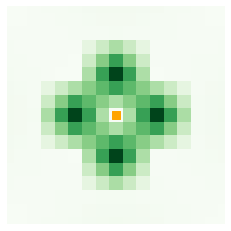

In [4]:
n=32
network_rec, out = display_receptive(network, n, weight_fill=1e-3, device=device)

plt.figure()
plt.imshow(out.detach().cpu().squeeze(), cmap='Greens', vmin=0, vmax=out.detach().cpu().max())
plt.scatter(n//2, n//2, c='#FFA500', s=50, marker='s')
plt.xlim(n//2-8,n//2+8)
plt.ylim(n//2+8,n//2-8)
plt.axis('off');

## Blind-spot network for coherent noise

We can now do the same for our new network

In [5]:
network = StructNoiseNetwork(1, 1, blindspot=True).to(device)

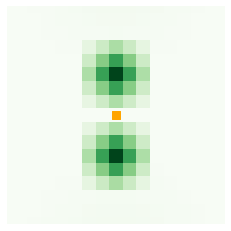

In [6]:
n=32
network_rec, out = display_receptive(network, n, weight_fill=1e-3, device=device)

plt.figure()
plt.imshow(out.detach().cpu().squeeze(), cmap='Greens', vmin=0, vmax=out.detach().cpu().max())
plt.scatter(n//2, n//2, c='#FFA500', s=50, marker='s')
plt.xlim(n//2-8,n//2+8)
plt.ylim(n//2+8,n//2-8)
plt.axis('off');

Nice! By modifying the way we handle the input image (only one flip over the y-axis instead of 4 rotations), our network is now blind not only to the central pixels but to the entire middle row in the x-axis.